## l. Introduction

### 1. Identify a domain specific area:

#### Bioinformatics:

As an interdisciplinary field that utilises software tools to analyse biological data, bioinformatics has emerged as a crucial tool in developing insights, specifically into larger datasets that have become more numerous with the development of computer storage, processing power and means of collecting and analysing data across the fields of biology, chemistry, physics, computer science, mathematics and statistics.

Some of the most noteworthy examples of bioinformatics exist in the field of genomics, where DNA sequencing has created wide ranging implications for the study of disease, human health and longevity. 

#### Bioinformatics used in Diabetes research

Diabetes is threatening to become an epidemic of global proportions. In the United Kingdom alone, currently 4.8 million people have been diagnosed with diabetes with this number expected to climb to 5.5 million by 2030.
(ref. https://www.diabetes.org.uk/professionals/position-statements-reports/statistics)

The production of a regression model that takes various biological markers as independent variables and determines the probability that an individual is or is likely to be diabetic in the future, could be used in diagnoses and as an early warning system to allow subjects to implement certain bahavioural changes to increase the chance of a positive outcome, leading to greater longevity and a reduction of strain on health services.

### 2. Dataset:
 
In order to attempt to satisfy the premise outlined above, the dataset needs to contain measurements of several biological markers that are posessed by subjects of the study that either have or do not have diabetes.

Originally from the National Institute of Diabetes and Digestive and Kidney Diseases, this dataset was obtained from Kaggle
https://www.kaggle.com/datasets/mathchi/diabetes-data-set

It is not clear from the dataset if the outcomes as either diabetic or not diabetic were at the time of observation for the other columns in the dataset, or were recorded during follow up examinations. Without this information, the data may not provide predictive characteristics of whether an individual may develop diabetes if they currently do not have it, but this does not affect the ability of the data to train a model to predict if an individual has or does not have diabetes.

The subjects of this dataset were all females of at least 21 years old, and of Pima Indian heritage. Any conclusions drawn from the analysis of this dataset should remain cognisant of the focused demographic within the dataset, and wider generalisations about differeing demographics should be made with caution.

### 3. Objectives

Early diagnosis of any medical condition can dramatically increase the chance of a positive outcome. This project will attempt to create a predictive regression model take certain bio-markers as input and make a prediction with reasonable accuracy of either diabetic or not diabetic. The limitations of this project, such as the imited number and demographic of the test subjects, as well as the limited number of biomarkers observed and used as independent variables means that the model is more likely to act as a proof of concept, rather than a wholly effective predictor.

With more data, more test subjects from a wider cross-section of culture and genetics, and a wider selection of predictive modelling techniques, a model with greater efficacy should be possible by following the general principles set out in this project.

## ll. Implementation

#### Import pandas library for creating dataframe
 - the data will be held locally in a pandas dataframe, using pandas read_csv method

In [91]:
import pandas as pd

In [92]:
# create and check dataframe
df = pd.read_csv('data/diabetes.csv')

# check the first 10 rows of data
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#### The table appears to comply with 1NF, 2NF and 3NF:
There is a single primary key, no duplication of data and no transitive dependencies.

### Database overview:
 - Pregnancies: Number of times pregnant
 - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 - BloodPressure: Diastolic blood pressure (mm Hg)
 - SkinThickness: Triceps skin fold thickness (mm)
 - Insulin: 2-Hour serum insulin (mu U/ml)
 - BMI: Body mass index (weight in kg/(height in m)^2)
 - DiabetesPedigreeFunction: Function which scores the likelihood of diabetes based on family history
 - Age: Age (years)
 - Outcome: (Class variable) 1 = positive for diabetes, 0 = negative for diabetes

#### Determine the shape of the data

In [93]:
# get the number of rows (records) and columns (dependent variables)
df.shape

(768, 9)

The data has <b>768 records</b> and <b>9 fields</b>

#### Check for null / na values

In [94]:
# check if any na values exist
print(df.isna().any())

# create a blank line to separate print statements
print()

# check if any null values exist
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


#### There are no null/na values in any fields of the database

#### Generate an overview of general descriptive statistics about each column in the database using pandas '.describe()' method including:
 - central tendency
 - dispersion
 - standard deviation
 - mean values
 - max values

In [95]:
# print out an overview of descriptive statistics about the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Looking at the quartiles and the mean, we can determine the skewness of the data:
 - if the mean is less than the 50% (median) value, the data is skewed to the left
 - if the mean is greater than the 50% value, it is skewed to the right
 
 #### It should be noted that the 'outcome' column is categorical, despite being represented by a 1 or a 0. This means that numerical analysis is mostly useless 

#### Import matplotlib and seaborn for data visualisation
The inline backend embeds the plots directly into the notebook

In [96]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#### The table above suggests that the glucose series is skewed to the right as the mean is greater than the median

Lets visualise that glucose data as a histogram with the mean, median and probability distribution on the plot

Text(150, 96, 'median')

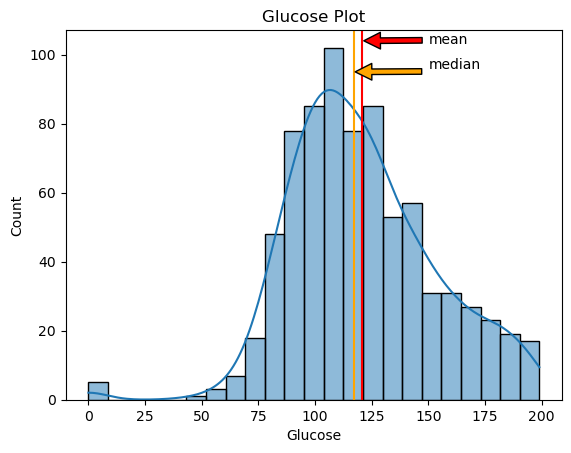

In [97]:
sns.histplot(data = df, x=df['Glucose'], kde=True).set_title('Glucose Plot')

# add mean and label
plt.axvline(x=df['Glucose'].mean(), color='red')
plt.annotate('mean', xy=(120,104), xytext=(150,103),
            arrowprops=dict(facecolor='red', shrink=0.05))

# add median and label
plt.axvline(x=df['Glucose'].median(), color='orange')
plt.annotate('median', xy=(116,95), xytext=(150,96),
            arrowprops=dict(facecolor='orange', shrink=0.05))

#### As predicted, the data is skewed right
In the context of our dataset, this shows us that the higher glucose levels are more numerous than the lower glucose levels in samples provided by the test subjects

#### There are columns that have 0 values for the min and lower 25% quantile that don't make sense

Let's plot these fields to goet a feel for how anomalous this data is

[]

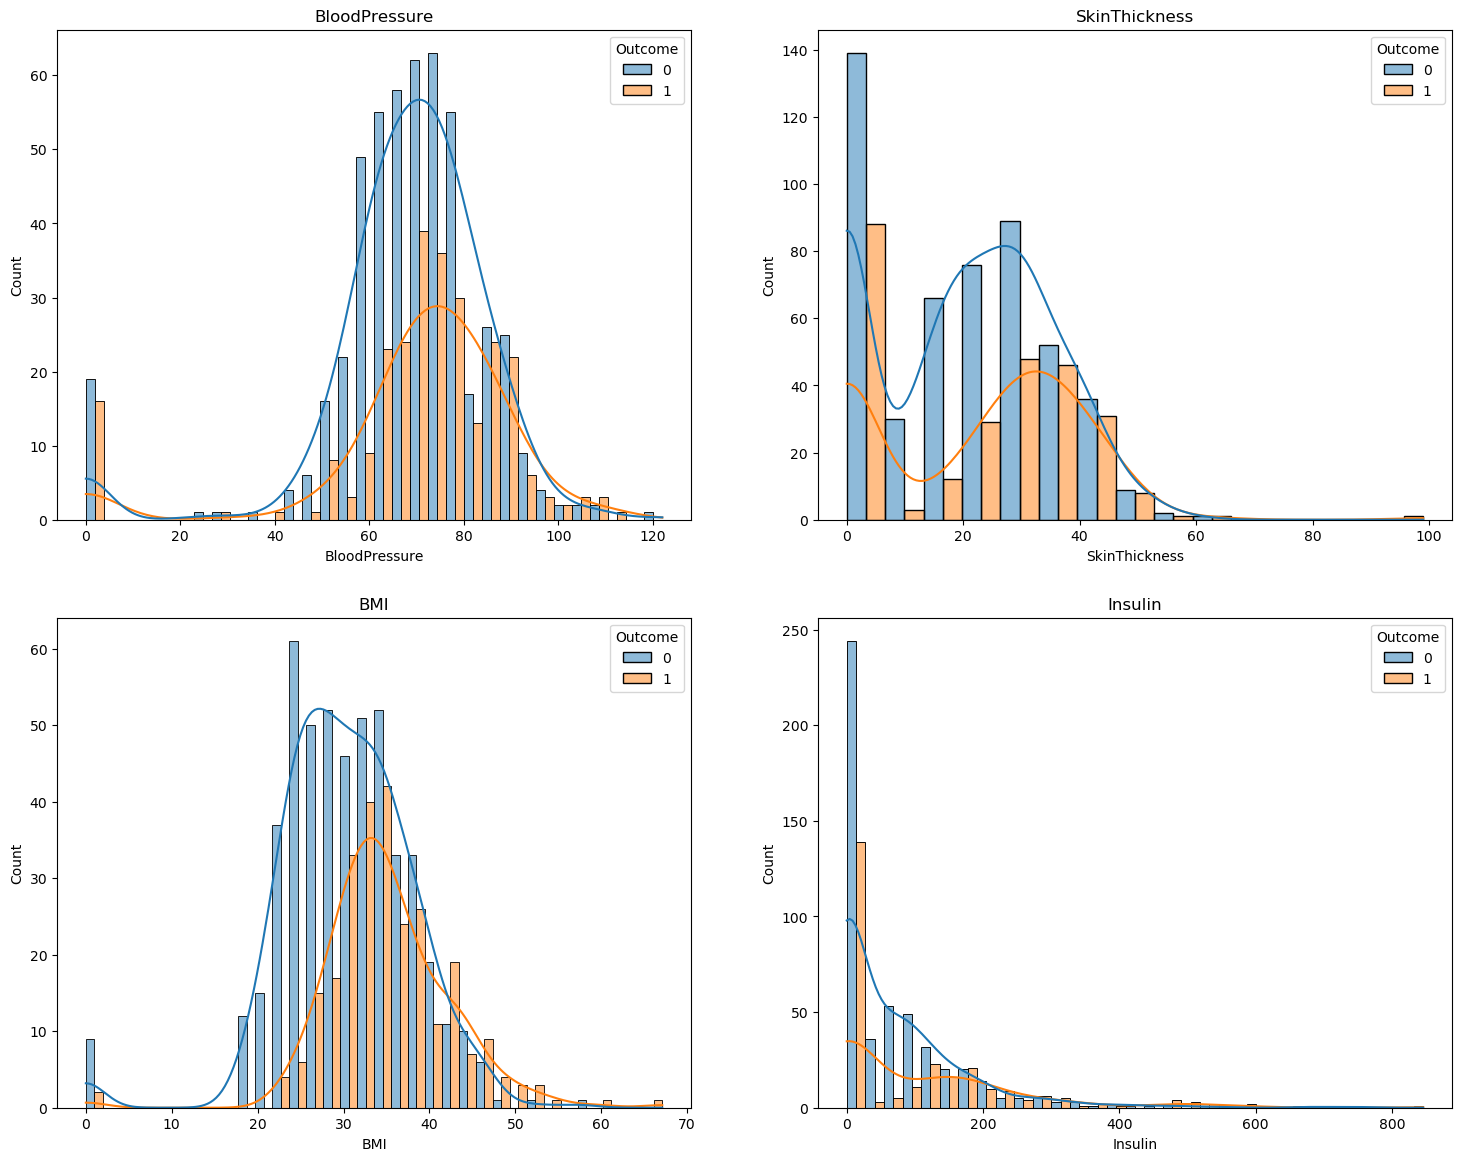

In [98]:
# create list of specific columns to check
check_0_list = ['BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

# initialise size of each plot
plt.figure(figsize = [18, 14])

# loop through list of chosen columns plotting each graph in a 2 by 2 grid
for num, i in enumerate(check_0_list):    
    plt.subplot(2, 2, (num+1))
    sns.histplot(data = df, x = df[str(i)], hue = df['Outcome'], multiple  = 'dodge', kde=True)
    plt.title(i)
plt.plot()

#### This visualisation has highlighted some potential anomalous values that were missed by the earlier check for null and na values
 - the probability distributions are visibly altered by these values
 - the most egregious examples are 'SkinThickness' and 'Insulin'
 
#### It is not clear that 0 is an anomalous reading for insulin, so this field should be noted for further exploration:

"Insulin is measured in “microunits per milliliter” (mcU/ml or mIU/ml). Unfortunately, there isn’t much agreement on what level is ideal. The website Health Central says 10–20. Dr. Mercola says less than 5."
ref:https://www.diabetesselfmanagement.com/blog/do-you-know-your-insulin-level/

#### Skin thickness and blood pressure are shown in the correlation a few cells below as being the 2 weakest correlations with outcome of all the fields in the dataset

#### BMI is relatively strongly correlated with outcome, so lets impute the 0 values which are obviously anomalous

In [99]:
# determine how many blood pressure values are 0 
BMI_0_df = df[df['BMI'] == 0]
print(BMI_0_df.shape)
BMI_0_df

(11, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


#### Ther are 11 instances of BMI values equaling 0
 - measure of central tendency can be used to determine which imputation method should be used to substitute for the anomalous values.
 - the probability distribution resembles a normal distribution closely enough that the mean is a suitable replacement for the 0 values 

In [100]:
# replace the 0 values in BMI column with the mean value of all BMI data
df['BMI'].replace(to_replace=0, value=df['BMI'].mean(), inplace=True)

Text(39, 101, 'median')

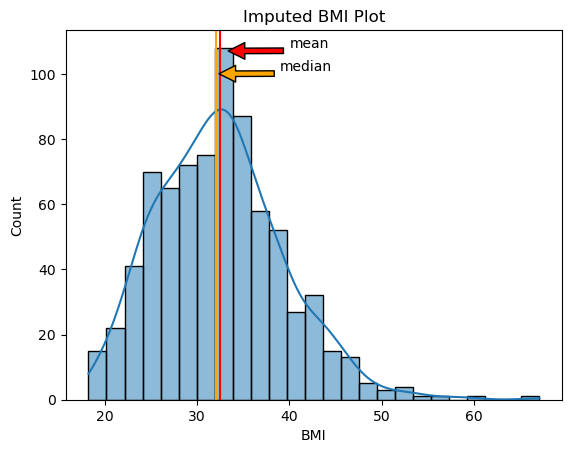

In [101]:
sns.histplot(data = df, x=df['BMI'], kde=True).set_title('Imputed BMI Plot')

# add mean and label
plt.axvline(x=df['BMI'].mean(), color='red')
plt.annotate('mean', xy=(33,107), xytext=(40,108),
            arrowprops=dict(facecolor='red', shrink=0.05))

# add median and label
plt.axvline(x=df['BMI'].median(), color='orange')
plt.annotate('median', xy=(32,100), xytext=(39,101),
            arrowprops=dict(facecolor='orange', shrink=0.05))

#### The BMI data has no anomalies and is slightly skewed to the right

#### Check if the dataset is balanced in terms of outcomes

0    500
1    268
Name: Outcome, dtype: int64

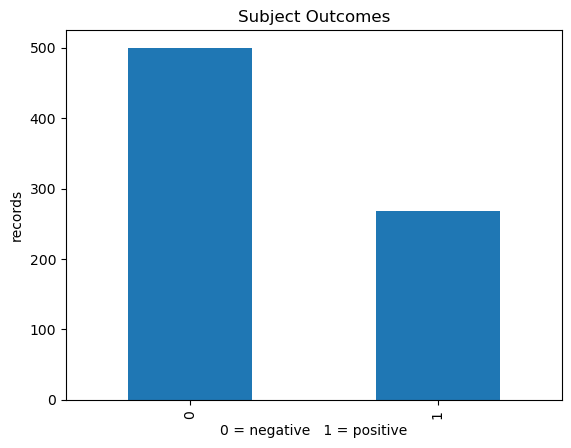

In [102]:
# create a pandas series object
counts = df['Outcome'].value_counts()

# plot bar chart showing outcomes
outcomes = counts.plot(kind='bar', )
outcomes.set_title('Subject Outcomes')
outcomes.set_xlabel('0 = negative   1 = positive')
outcomes.set_ylabel('records')

# show the number of positive and negative outcomes
counts

#### The dataset has significantly higher negative than positive diabetes disgnoses

#### Intuitively, the serum glucose levels seems significant
Plot the glucose level against the number of records, differentiating between positive and negative outcomes

Text(0.5, 1.0, 'Glucose - Differentiated Outcomes (unbalanced outcomes)')

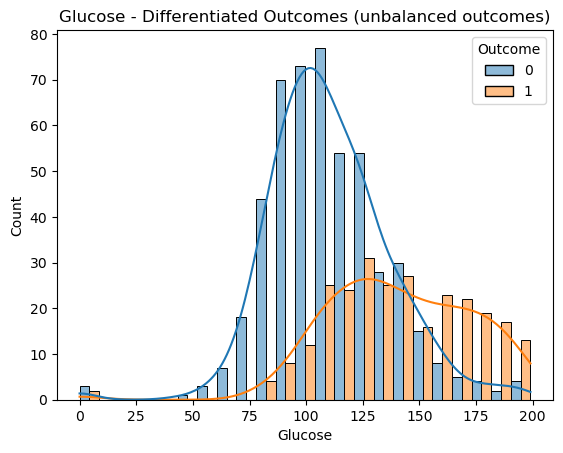

In [103]:
sns.histplot(data = df, x=df['Glucose'], hue=df['Outcome'], multiple ='dodge', kde=True).set_title('Glucose - Differentiated Outcomes (unbalanced outcomes)')

#### Negative Outcomes:
 - close to a normal distribution with minor positive skewness
 - relatively high peak creating a Leptokurtic curve
 
#### Positive Outcomes:
 - stronger positive skewness with a large tail to the right side of the mode
 - flat-topped Platykurtic curve
 
####  The difference in heights of the curves could be related to a higher no. of negative records than positive in the dataset

### Normalise the outcomes for cleaner comparison

In [104]:
# create separate dataframes by outcome 
df_1 = df[df['Outcome'] == 1]
df_0 = df[df['Outcome'] == 0]

# take a sample of records from the negative that matches the less numerous positive records in size
df_0_sample = df_0.sample(268,replace = False)

# concatenate the 2 dataframes back together
df_equal = pd.concat([df_1, df_0_sample])

# check the number of records for each outcome in new balanced dataframe
df_equal['Outcome'].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

#### Replot the graph above with normalised outcomes

Text(0.5, 1.0, 'Glucose - Differentiated Outcomes (Balanced Outcome)')

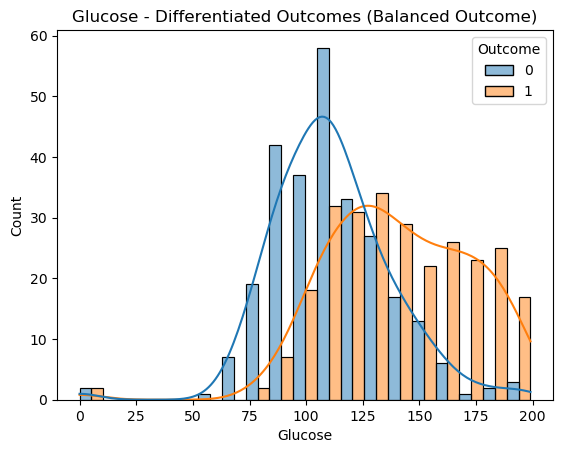

In [105]:
sns.histplot(data = df_equal, x=df_equal['Glucose'], hue=df_equal['Outcome'], multiple ='dodge', kde=True).set_title('Glucose - Differentiated Outcomes (Balanced Outcome)')

In [110]:
df_equal

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627,50,1
2,8,183,64,0,0,23.300000,0.672,32,1
4,0,137,40,35,168,43.100000,2.288,33,1
6,3,78,50,32,88,31.000000,0.248,26,1
8,2,197,70,45,543,30.500000,0.158,53,1
...,...,...,...,...,...,...,...,...,...
345,8,126,88,36,108,38.500000,0.349,49,0
271,2,108,62,32,56,25.200000,0.128,21,0
426,0,94,0,0,0,31.992578,0.256,25,0
527,3,116,74,15,105,26.300000,0.107,24,0


#### The principle of the data remains the same, despite the differrence between the curves being less dramatic

### Use pandas corr() function to look for further correlation of features

In [39]:
corr = df.corr()
corr.sort_values('Outcome', ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.312254,0.173844,0.238356,1.000000
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.218814,0.137337,0.263514,0.466581
BMI,0.021546,0.218814,0.184252,0.381755,0.185365,1.000000,0.153508,0.025748,0.312254
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.025748,0.033561,1.000000,0.238356
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.021546,-0.033523,0.544341,0.221898
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.153508,1.000000,0.033561,0.173844
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.185365,0.185071,-0.042163,0.130548
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.381755,0.183928,-0.113970,0.074752
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.184252,0.041265,0.239528,0.065068


#### Create a heatmap to help visualise the correlation

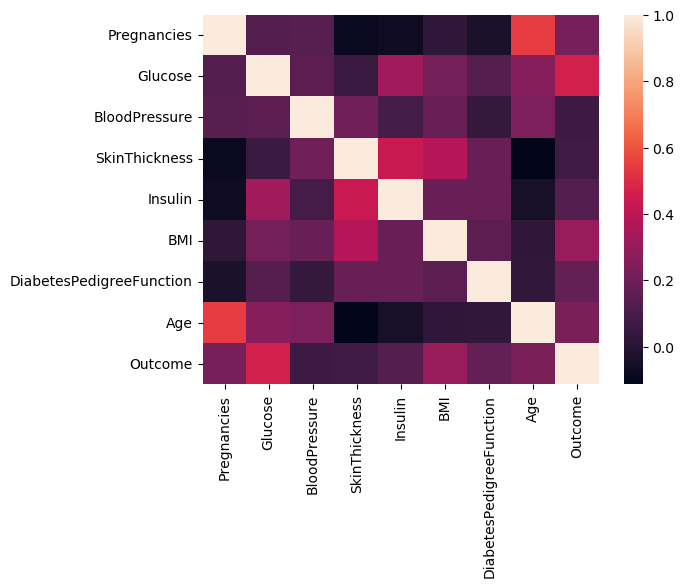

In [40]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

#### Brighter colour indicates stronger correlation
 - As expected, glucose has a strong correlation with outcome, as does BMI
 - Inversely, skin thickness and blood pressure have weaker correlation with outcome
 - The diabetes pedigree function has a weaker correlation than my intuition suggested

#### Plot the BMI frequency differentiating between outcomes
 - This time plot the balanced outcomes dataframe next to the original dataframe for comparison 

[]

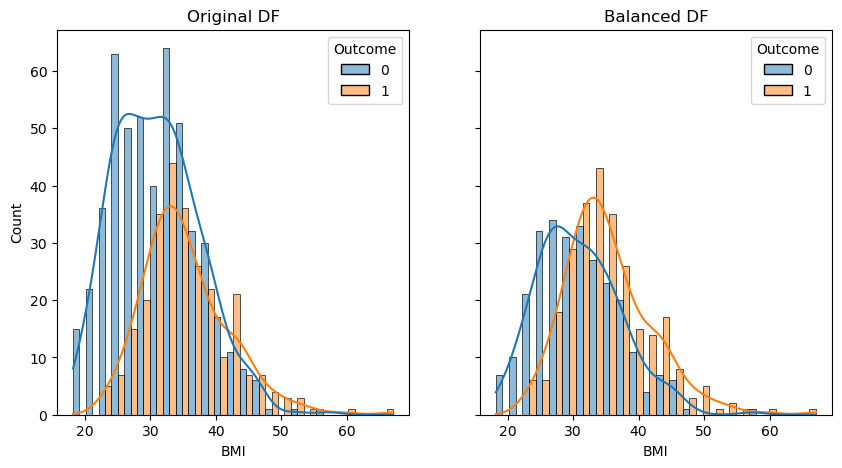

In [41]:
# initiate separate axes to be plotted in 2 columns sharing both axes
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, sharex=True, figsize = [10, 5])

sns.histplot(data = df, x=df['BMI'], hue=df['Outcome'], multiple ='dodge', kde=True, ax = ax1).set(title='Original DF')
sns.histplot(data = df_equal, x=df_equal['BMI'], hue=df_equal['Outcome'], multiple ='dodge', kde=True, ax=ax2).set(title='Balanced DF')

plt.plot()

#### Here we can observe the importance of normalising the outcome data. The highest peak of the kernel density estimation of the histogram plots flip with normalised data. This time both plots resemble a normal distribution 

The correlation between BMI and outcome is still visible but not as clearly defined with normalised outcome data

#### The first 8 columns are independent variables, and the 'outcome' column is the target to predict, or the 'y' variable in the regression model

In [42]:
# establish a list of feature names, and delete 'outcome'
features = list(df)
features.remove('Outcome')
print(features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


### Prepare data for use in regression model
 - create a new dataframe of features by dropping the final column 'outcome' from the original dataframe
 - create a new dataframe that just holds the 'y' variable 'outcome'
 - test balanced and original dataframe for accuracy

In [121]:
# drop the dependent variable
X = df.drop(['Outcome'], axis='columns')

# check dataframe
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [111]:
# create dataframe of dependent variables only
Y = df['Outcome']

# create balanced outcome dependent variable dataframe
Y_eq = df_equal['Outcome']

#### Import sklearn modules to create training and testing split of the data

In [114]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# create test / train data
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, train_size=0.8, random_state = 7)

## Chosing a Model

### Naive Bayes
 - generally fast and efficient
 - unlikely to result in overfitting due to restrictions on ability to represent complex behaviour
 - sometimes preferred when dealing with text as the relatively simple algorithm can deal with a large corpus quickly
 
### Decision Tree
 - generally very fast
 - can handle both numerical and categorical data
 - easy to interpret
 - success dependent on algorithm used to decide optimal choice
 - prone to overfitting in particularly deep trees

### Random Forest
 - collection of aggregated decision trees
 - improves on decision tree overfitting without increasing significant increase of error due to bias
 - can reduce bias and error due to variance by training on different samples of data, or creating a random subset of features for different trees
 - features need to be chosen randomly as to not correlate with other trees in the forest
 
### Logistic Regression
 - categorical classifier suitable for our dataset
 - good accuracy for smaller datasets
 - finds relationship between features
 - less prone to overfitting in low dimensional datasets
 - subject to certain assumptions:
   - little / no multicollinearity between independent variables
   - independent variables linearly related to the log odds (log(p/(1-p))
   - no non-meaningful variables
   - no outliers
   
### Gradient Boosting
 - adjust weights to identify difficult to classify observations and iterates to improve predictions in following trees
 - gbm algorithm uses the error metric to evaluate model performance without need for user specified parameters

#### Import modules to test dfferent model performance

In [79]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

#### Batch fit the training data to the selection of models

In [73]:
# logistic regression
logistic_reg = linear_model.LogisticRegression(solver="liblinear").fit(X_train,Y_train)

# naive bayes
gaussian = GaussianNB().fit(X_train,Y_train)

# decision tree
dec_tree = DecisionTreeClassifier(random_state=42).fit(X_train,Y_train)

# random forest
rand_forest = RandomForestClassifier(random_state=42,verbose=False).fit(X_train,Y_train)

# gradient boost
grad_boost = GradientBoostingClassifier(verbose=False).fit(X_train,Y_train)

### Create a list of the models to loop over and compare performance

In [118]:
# list of fit models
models = [logistic_reg, gaussian, dec_tree, rand_forest, grad_boost]

In [148]:
# loop through all models
for model in models:
    
    # get the name of the model
    name = model.__class__.__name__
    
    # get the predicted values
    predict = model.predict(X_test)
    
    # get the R squared cross validation score
    R2CV = cross_val_score(model,X_test,Y_test,cv=10,verbose=False).mean()
    
    # get the mean squared error
    error = -cross_val_score(model,X_test,Y_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    
    # print the data in human readable format
    print(name + '\n')
    print("ACC:\t\t\t",accuracy_score(Y_test,predict))
    print("R2CV:\t\t\t",R2CV)
    print("MEAN SQUARED ERROR:\t",np.sqrt(error))
    print("=" * 120 + '\n')

LogisticRegression

ACC:			 0.7987012987012987
R2CV:			 0.7716666666666666
MEAN SQUARED ERROR:	 0.4778423728943817

GaussianNB

ACC:			 0.7597402597402597
R2CV:			 0.7529166666666667
MEAN SQUARED ERROR:	 0.4970747764002246

DecisionTreeClassifier

ACC:			 0.7597402597402597
R2CV:			 0.70125
MEAN SQUARED ERROR:	 0.5465802777268862

RandomForestClassifier

ACC:			 0.7922077922077922
R2CV:			 0.7341666666666666
MEAN SQUARED ERROR:	 0.5155902766086007

GradientBoostingClassifier

ACC:			 0.7922077922077922
R2CV:			 0.70125
MEAN SQUARED ERROR:	 0.5404473455696988



## lll. Conclusions

From the selected models, the most accurate was the logistic regression with an R2 of <b>0.77</b>, and a mean squared error of <b>0.48</b>

#### Show a chart of the errors to all models

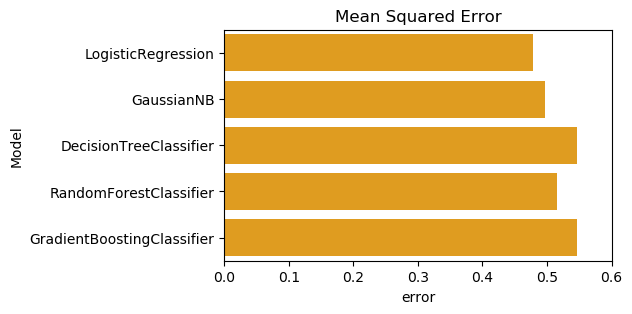

In [160]:
# create daataframe to show error of each model
df_error = pd.DataFrame(columns=["Model","error"])

# loop thorugh each model in the trained model list
for model in models:
    
    # get the name of the model
    name = model.__class__.__name__
    
    # get the meas squared error
    error = -cross_val_score(model,X_test,Y_test,cv=10,scoring="neg_mean_squared_error").mean()
    
    # append the data into the error dataframe 
    result = pd.DataFrame([[name,np.sqrt(error)]],columns=["Model","error"])
    df_error = df_error.append(result)
    
# set the size of the visualisation    
figure = plt.figure(figsize=(5,3)) 

# create a bar plot of each error value
sns.barplot(x="error", y="Model", data=df_error, color="orange")

# create a buffer to the end of the chart
plt.xlim(0,0.6)

plt.title("Mean Squared Error")
plt.show()

The <b>Mean Squared Error</b> tells us about the difference between the original and predicted values. The smaller the number, the closer the fit is to the data

#### Visualise the R squared value for each model

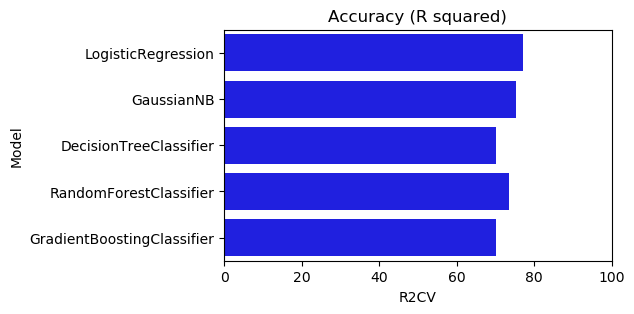

In [161]:
# create dataframe to hold accuracy data
df_r2 = pd.DataFrame(columns=["Model","R2CV"])

# loop through all trained models
for model in models:
    
    # get model name
    name = model.__class__.__name__
    
    # get R2 score and append to dataframe
    R2CV = cross_val_score(model,X_test,Y_test,cv=10,verbose=False).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["Model","R2CV"])
    df_r2 = df_r2.append(result)
    
# set figure size of plot
figure = plt.figure(figsize=(5,3))   

# create barplot of accuracy
sns.barplot(x="R2CV",y="Model",data=df_r2,color="blue")

# limit x axis to 100
plt.xlim(0,100)
plt.title("Accuracy (R squared)")
plt.show()

The <b>R squared</b> value tells us how well a model can predict the value of the response variable in percentage terms. The logistic regression model fits the data better than the other models

#### Examine the coefficients of each feature to determine importance in fitting the logistic regression model


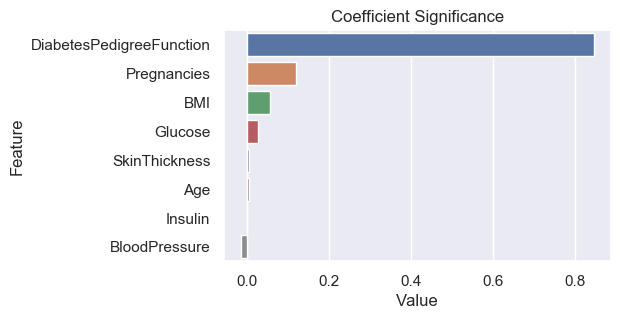

In [193]:
# create dataframe to hold coefficient values
df_coef = pd.DataFrame({'Value': models[0].coef_[0], 'Feature': features})

# set size of plot
plt.figure(figsize=(5, 3))

# create barplot
sns.barplot(x="Value", y="Feature", data=df_coef.sort_values(by="Value", ascending=False)[0:8])

# set title
plt.title('Coefficient Significance')

plt.show()

The visualisation of the coefficients has shown Diabetes Pedigree Function having a disproportionately large impact when compared to its correlation with the outcome as explored above.

Glucose had the strongest correlation with outcome, but the model has only given it the 4th highest coefficient value, which is a fraction of the highest coefficient, Diabetes Pedigree Function

# 10. Reflective Evaluation

The use of machine learning in medicine is not a novel idea, but taking responsibility away from health practitioners and leaving important decisions in the hands of an algorithm is a difficult bridge to cross, in a field where peoples health and lives are at stake.

The model in this notebook as implemented is of little use medically, yet it is undoubtedly indicative of technology the medical industry will adopt en masse at some point in the future. Exploring the ever growing libraries of datasets and testing out machine learning techniques remains an extremely important part of medical research.

This logistic regression model managed an prediction accuracy of 77% with a mean ssquared error rate of 0.48, which would be unacceptable in the real world. There are obviously ways to improve on the performance of models in the area of diagnosing diabetes, and other medical conditions. More extensive observations and instances of data from a wider cross-section of society, more refined or advanced machine learning techniques and certainly more capable data scientists would be able to do a far better jobin acheiving higher model performance.

I would like to address the model's disproportionately high coefficient value for the diabetes pedigree function, as intuitively this feels like there is an inefficiency here.

This notebook was created in Python, but R is another language that is popular for creating such work in industry, as it specialises in mathematical and statistical computing.

Deep Nerual Networks are arguably the most popular type of machine learning algorithms at the time of writing. This does not necessarily mean they are always the best tools for the job, and often much energy and time is wasted training these deep neural networks where they don't acheive better results than a far less resource intensive 'traditional' regression or classification algorithm.

Other than the scikit-learn library used in this notebook, the weka library would also be able to acheive similar results as it provides classification and regression models.